In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
# test

In [77]:
train_df = pd.read_csv("./data_set/train.csv")
test_df = pd.read_csv("./data_set/test.csv")

In [145]:
test_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Wilkes,Mrs,James (Ellen Needs)
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Myles,Mr,Thomas Francis
894,895,NaN,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Wirz,Mr,Albert
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
896,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,Svensson,Mr,Johan Cervin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,others,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [146]:
test_df["Pclass"].value_counts()

Pclass
3    217
1    107
2     93
Name: count, dtype: int64

In [78]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [79]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [80]:
# 결측치 메우기
    # Fare의 결측치를 메우기 위해서 pClass 별 fare의 평균을 구한다.
fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
fare_mean.columns = ["Pclass", "Fare_mean"]
fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [81]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [82]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [83]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
all_df = pd.merge(all_df, fare_mean, on="Pclass", how="left")
all_df.loc[(all_df['Fare'].isnull()), "Fare"] = all_df["Fare_mean"]

In [85]:
all_df = all_df.drop(["Fare_mean"], axis=1)

In [86]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [87]:
### 호칭을 변수로 추가하기
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [88]:
# name_df=all_df["Name"].str.replace(",", ".").str.split(".", 2)

name_df=all_df["Name"].str.split('[,.]',expand=True)

In [89]:
name_df.columns = ["family_name", "honorific", "name", "_"]

In [90]:
name_df.isnull().sum()

family_name       0
honorific         0
name              0
_              1308
dtype: int64

In [91]:
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [92]:
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [93]:
all_df = pd.concat([all_df, name_df], axis=1)

In [94]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,_
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,None
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,None
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,None
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,None


<Axes: xlabel='honorific', ylabel='Age'>

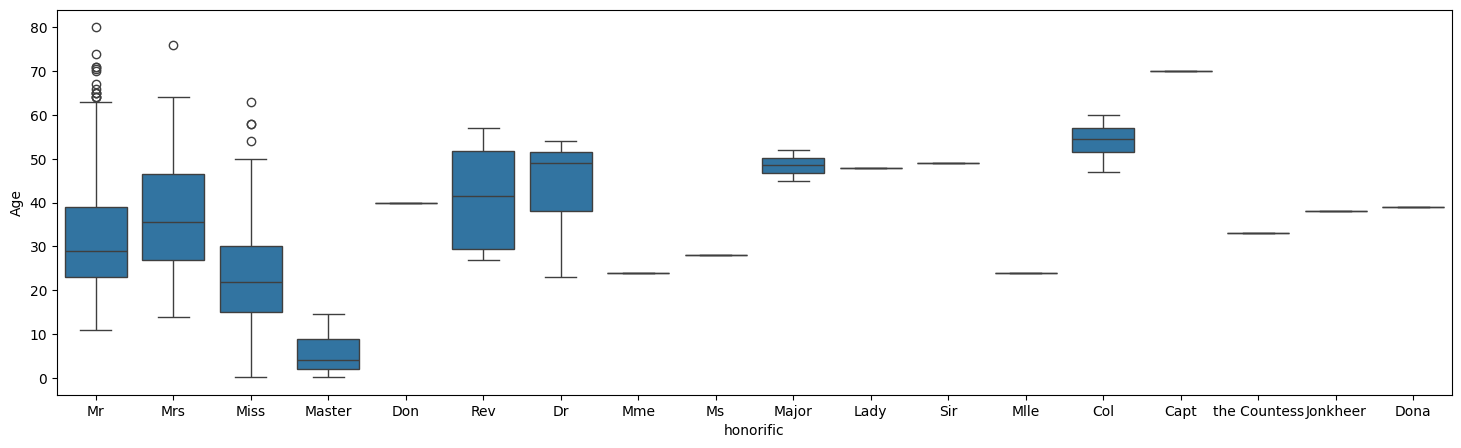

In [95]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [96]:
all_df_honorific = all_df[["honorific", "Age"]].groupby("honorific").mean()

In [97]:
all_df_honorific

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [98]:
all_df= pd.merge(all_df,all_df_honorific, how="left", on="honorific")
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name,_,Age_y
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris,None,32.252151
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None,36.994118
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina,None,21.774238
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel),None,36.994118
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry,None,32.252151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf,None,32.252151
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina,None,39.000000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen,None,32.252151
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick,None,32.252151


In [99]:
all_df.loc[(all_df["Age_x"].isnull()), "Age_x"] = all_df["Age_y"]

In [100]:
all_df = all_df.drop(["_", "Age_y"], axis=1)

In [101]:
train_df = all_df.loc[0:len(train_df),:]
test_df = all_df.loc[len(train_df):,:]

In [102]:
train_df.describe()


,PassengerId,Survived,Pclass,Age_x,SibSp,Parch,Fare
count,892.000000,891.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,446.500000,0.383838,2.309417,29.771245,0.522422,0.381166,32.176882
std,257.642517,0.486592,0.835923,13.272356,1.102264,0.805706,49.672240
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,21.774238,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,892.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='honorific'>

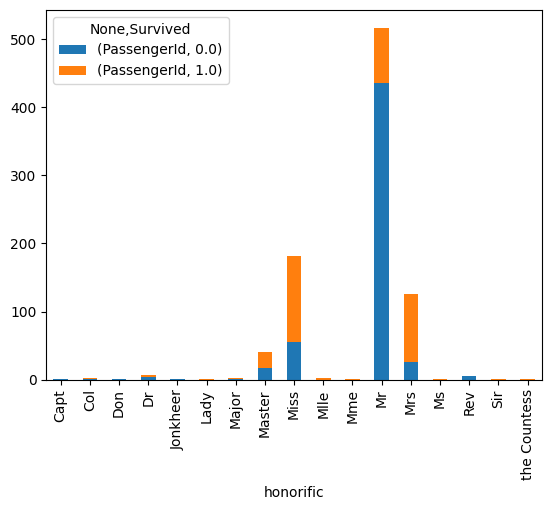

In [103]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [104]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'family_name',
       'honorific', 'name'],
      dtype='object')


In [105]:
all_df.loc[~((all_df["honorific"] == "Mr") | (all_df["honorific"] == "Miss") | (all_df["honorific"] == "Mrs")|(all_df["honorific"] == "Master")),"honorific"] = "others"
all_df





,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,others,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


In [106]:
all_df = all_df.drop(["name", "PassengerId", "Name", "Ticket","Cabin"],axis = 1)

In [107]:
all_df = all_df.drop(["family_name"],axis = 1)

In [108]:
categories = all_df.columns[all_df.dtypes == "object"]
categories

Index(['Sex', 'Embarked', 'honorific'], dtype='object')

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
all_df["Embarked"].fillna("missing", inplace=True)

/var/folders/d4/4wc2d_0j5vv5zqznm4l6905c0000gn/T/ipykernel_1409/967806343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_df["Embarked"].fillna("missing", inplace=True)


In [111]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [112]:
all_df["Sex"]

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [113]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [114]:
all_df.head()

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific
0,0.0,3,1,22.0,1,0,7.2500,2,2
1,1.0,1,0,38.0,1,0,71.2833,0,3
2,1.0,3,0,26.0,0,0,7.9250,2,1
3,1.0,1,0,35.0,1,0,53.1000,2,3
4,0.0,3,1,35.0,0,0,8.0500,2,2


In [129]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop=True)
train_Y = train_df["Survived"].reset_index(drop=True)

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop=True)

In [117]:
import lightgbm as lgb

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [132]:
train_Y.drop(train_Y.tail(1).index, inplace=True)

In [141]:
# len(train_X)
len(train_Y)

891

In [133]:
train_Y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [134]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [135]:
categories = ["Pclass", "Embarked", "honorific"]

In [136]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_train, categorical_feature=categories, reference=lgb_train)

In [137]:
lgbm_params = {
    "objective" : "binary",
    "random_seed" : 1234
}

In [138]:
model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=100)

[LightGBM] [Info] Number of positive: 274, number of negative: 438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8


[LightGBM] [Fatal] Length of labels differs from the length of #data


LightGBMError: Length of labels differs from the length of #data